In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [2]:
print("Files inside:", os.listdir(path))
file_path = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(file_path)

Files inside: ['Mall_Customers.csv']


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

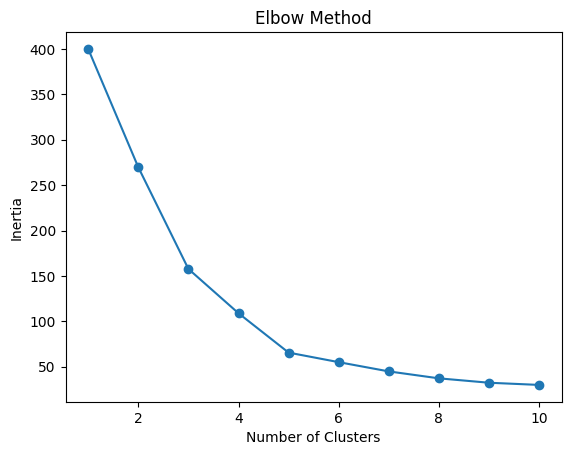

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [9]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")


k=2, silhouette score=0.321
k=3, silhouette score=0.467
k=4, silhouette score=0.494
k=5, silhouette score=0.555
k=6, silhouette score=0.540
k=7, silhouette score=0.528
k=8, silhouette score=0.455
k=9, silhouette score=0.457
k=10, silhouette score=0.443


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


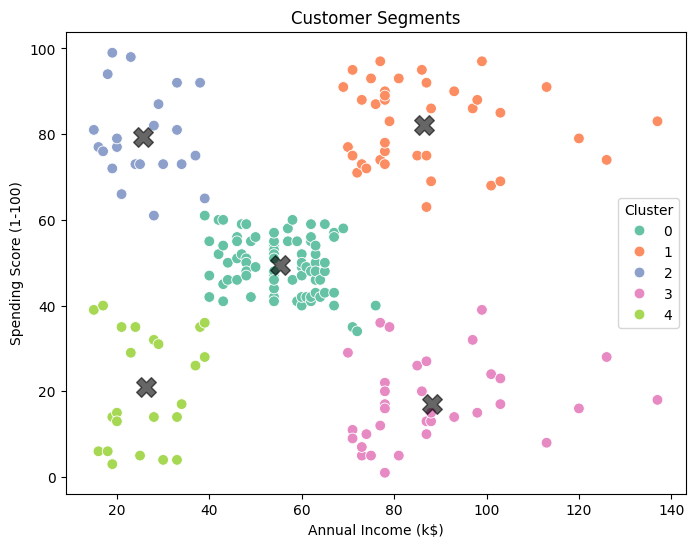

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set2",
    s=60
)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.6, marker="X")
plt.title("Customer Segments")
plt.show()


In [12]:
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# Bouns

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

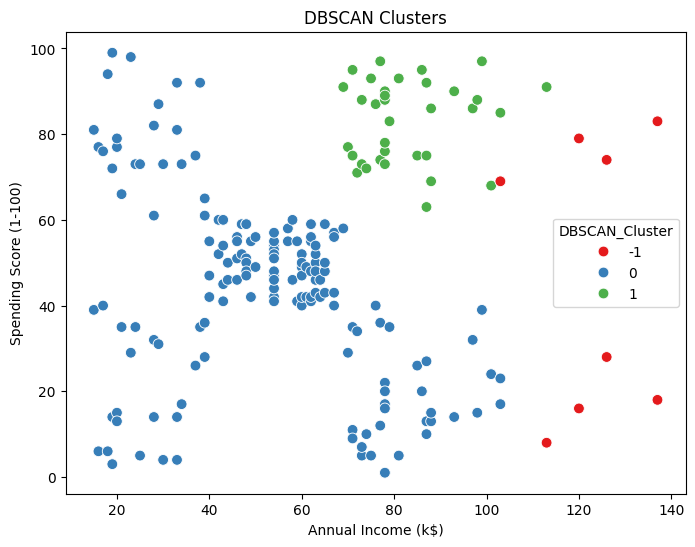

In [14]:
df["DBSCAN_Cluster"] = dbscan_labels
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["DBSCAN_Cluster"],
    palette="Set1",
    s=60
)
plt.title("DBSCAN Clusters")
plt.show()

In [15]:
# KMeans Clusters
print("KMeans Clusters Averages:")
print(df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())

# DBSCAN Clusters
print("\nDBSCAN Clusters Averages:")
print(df.groupby("DBSCAN_Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())


KMeans Clusters Averages:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

DBSCAN Clusters Averages:
                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 0                       52.490446               43.101911
 1                       82.542857               82.800000
